Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.


Ниже вы найдете пошаговую инструкцию по выполнению проекта.

Описание датасета:

1 school — аббревиатура школы, в которой учится ученик
2 sex — пол ученика ('F' - женский, 'M' - мужской)
3 age — возраст ученика (от 15 до 22)
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16 schoolsup — дополнительная образовательная поддержка (yes или no)
17 famsup — семейная образовательная поддержка (yes или no)
18 paid — дополнительные платные занятия по математике (yes или no)
19 activities — дополнительные внеучебные занятия (yes или no)
20 nursery — посещал детский сад (yes или no)
21 higher — хочет получить высшее образование (yes или no)
22 internet — наличие интернета дома (yes или no)
23 romantic — в романтических отношениях (yes или no)
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28 absences — количество пропущенных занятий
29 score — баллы по госэкзамену по математике

# Дата сет

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.xls')
display(stud_math.head(10))
stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
#размер датасета
stud_math.shape

(395, 30)

Датасет содержит:

395 строк (учеников);
30 признаков, в т.ч. целевой признак - score - оценка по математике;
из них 13 признаков числовых, 17 строковых.

# Функции

In [4]:
def get_boxplot(data, column, score_column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y=score_column, 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def uniq_nan (df,c):
# Уникальные значения, пропущенные значения 
    column_type_numeric = False
    # тип колонки
    if df[c].dtype == 'O':
        print("Столбец:", c, "не является числовым")
    elif df[c].dtype == "int64" or df[c].dtype == "float64":
        column_type_numeric = True        
        print("Столбец:", c, "является числовым")
    else:
        print('Признак', c, 'имеет тип', df[c].dtype)
    #print("Столбец:", c)    
    print(pd.DataFrame(df[c].unique()))    
    print("Пропущено значений:", df[c].isna().sum())
    print("Доля пропущенных значений:", round(100*df[c].isna().sum()/df[c].shape[0]))
    print(df[c].value_counts())

def uniq_nan_all (df,c):
    # Уникальные значения, пропущенные значения 
    column_type_numeric = False
    # тип колонки
    if df[c].dtype == 'O':
        print("Столбец:", c, "не является числовым")
    elif df[c].dtype == "int64" or df[c].dtype == "float64":
        column_type_numeric = True        
        print("Столбец:", c, "является числовым")
    else:
        print('Признак', c, 'имеет тип', df[c].dtype)
    #print("Столбец:", c)    
     
    print(pd.DataFrame(df[c].unique()))    
    print("Пропущено значений:", df[c].isna().sum())
    print("Доля пропущенных значений:", round(100*df[c].isna().sum()/df[c].shape[0]))
            
def get_stat_dif(df, c):
    cols = df.loc[:, c].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, c] == comb[0], 'score'], 
                        df.loc[df.loc[:, c] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', c)
            break        

def get_boxplot(df, column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def int_hist (df, c):
    print(df[c].hist())
    print(df[c].describe())
    print(df[c].value_counts().sort_values())

# Предварительная оценка данных

In [5]:
#Определяем корректность наименования столбцов. Принеобходимости их переименовываем
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
stud_math.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu','Mjob': 'mjob','Fjob': 'fjob', 
                          'studytime, granular':'studytime_granular'}, inplace=True)

In [7]:
#Проверка
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [8]:
# В данном блоке определяем в каких столбцах есть незаполненные данные.
list_col = stud_math.columns
list_view = []
list_view.clear()
for i in range(0,len(list_col)):    
    if stud_math[list_col[i]].isna().sum() > 0:
        list_view.append(list_col[i]) # наименование столбцов с пропущенными значениями
print(list_view)

['address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime_granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


In [9]:
# Смотрим более подробно на данные столбцы. Далее каждый столбец будет рассмотрен отдельно.

list_col = list_view

for i in range(0,len(list_col)):
    uniq_nan_all (stud_math,list_col[i])

Столбец: address не является числовым
     0
0    U
1  NaN
2    R
Пропущено значений: 17
Доля пропущенных значений: 4.0
Столбец: famsize не является числовым
     0
0  NaN
1  GT3
2  LE3
Пропущено значений: 27
Доля пропущенных значений: 7.0
Столбец: pstatus не является числовым
     0
0    A
1  NaN
2    T
Пропущено значений: 45
Доля пропущенных значений: 11.0
Столбец: medu является числовым
     0
0  4.0
1  1.0
2  3.0
3  2.0
4  NaN
5  0.0
Пропущено значений: 3
Доля пропущенных значений: 1.0
Столбец: fedu является числовым
      0
0   4.0
1   1.0
2   2.0
3   3.0
4  40.0
5   NaN
6   0.0
Пропущено значений: 24
Доля пропущенных значений: 6.0
Столбец: mjob не является числовым
          0
0   at_home
1    health
2     other
3  services
4   teacher
5       NaN
Пропущено значений: 19
Доля пропущенных значений: 5.0
Столбец: fjob не является числовым
          0
0   teacher
1     other
2       NaN
3    health
4  services
5   at_home
Пропущено значений: 36
Доля пропущенных значений: 9.0
Столбец: 

In [10]:
print(list_view)

['address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime_granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


# Оценим корреляцию данных

In [11]:
stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
studytime_granular,0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


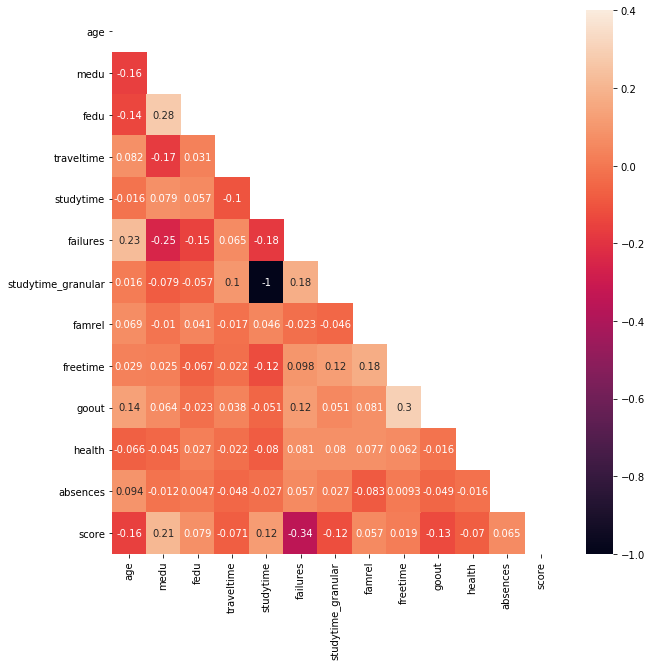

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
corr = stud_math.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True,  fmt='.2g', mask=matrix,
            vmin=-1, vmax=0.4)

Очевидна линейная корреляция между  'studytime_granular'
и 'studytime'. 
Для дальнейшей работы столбец 'studytime_granular' необходимо удалить.

In [13]:
stud_math.drop('studytime_granular', axis=1, inplace=True)

# Посмотрим на ключевой столбец score

In [14]:
uniq_nan(stud_math,'score')

Столбец: score является числовым
        0
0    30.0
1    50.0
2    75.0
3    55.0
4    95.0
5    45.0
6    60.0
7    70.0
8    80.0
9    25.0
10   40.0
11   85.0
12   90.0
13   65.0
14  100.0
15   35.0
16    0.0
17    NaN
18   20.0
Пропущено значений: 6
Доля пропущенных значений: 2.0
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)
count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
20.0      1
100.0     1
95.0      5
85.0      6
25.0      7
35.0      9
90.0     12
30.0     15
80.0     16
45.0     27
70.0     27
60.0     31
40.0     31
65.0     31
75.0     33
0.0      37
55.0     46
50.0     54
Name: score, dtype: int64


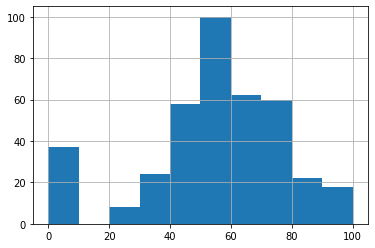

In [15]:
int_hist (stud_math,'score')

Видно, что часть значений пропущено, а часть равна нулю.
Нулевой результат вряд ли возможен. Для дополнительной проверки посмотрим нулевые значения столбца 'score'  со значениями столбца 'higher'  

In [16]:
stud_math[stud_math.score == 0][['higher', 'score']].head()

,higher,score
128,yes,0.0
130,yes,0.0
131,yes,0.0
134,yes,0.0
135,yes,0.0


Неизвестно происхождение нулевых значений. для дальнейшей оценки пропущенные и нулевые значения будут удалены

In [16]:
stud_math = stud_math[stud_math.score != 0]
stud_math = stud_math.dropna(subset=['score'])

In [17]:
# Разделим колонки по типам переменных, содержащихся в них.
cat_cols = stud_math.columns[stud_math.dtypes == 'O'].to_list()
num_cols_y = stud_math.columns[stud_math.dtypes != 'O'].to_list()
num_cols = stud_math.columns[stud_math.dtypes != 'O'].to_list()
num_cols.remove('score')

In [18]:
stud_math.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# Ниже рассматриваются столбцы с пропущенными данными.

## В качестве инструментов работы с данными выбраны:
### 1 - замена на неизвестное значение ("")
### 2 - замена на медианный вариант
### 3 - замена на наиболее встречающееся значение
### 4 - удаление

# address

In [19]:
uniq_nan(stud_math,'address')

Столбец: address не является числовым
     0
0    U
1  NaN
2    R
Пропущено значений: 14
Доля пропущенных значений: 4.0
U    265
R     73
Name: address, dtype: int64


In [20]:
# Для замены выбран 1 вариант (неизвестное)
stud_math.address = stud_math.address.fillna('unknown')

In [21]:
#Проверка
stud_math.address.isna().sum()

0

# famsize

In [22]:
uniq_nan(stud_math,'famsize')

Столбец: famsize не является числовым
     0
0  NaN
1  GT3
2  LE3
Пропущено значений: 24
Доля пропущенных значений: 7.0
GT3    228
LE3    100
Name: famsize, dtype: int64


In [23]:
# Для замены выбран 3 вариант (часто встречающееся)
stud_math.famsize = stud_math.famsize.fillna('GT3')

In [24]:
#Проверка
uniq_nan(stud_math,'famsize')

Столбец: famsize не является числовым
     0
0  GT3
1  LE3
Пропущено значений: 0
Доля пропущенных значений: 0.0
GT3    252
LE3    100
Name: famsize, dtype: int64


# pstatus

In [25]:
uniq_nan(stud_math,'pstatus')

Столбец: pstatus не является числовым
     0
0    A
1  NaN
2    T
Пропущено значений: 41
Доля пропущенных значений: 12.0
T    277
A     34
Name: pstatus, dtype: int64


In [26]:
# Для замены выбран 1 вариант (неизвестное)
stud_math.pstatus = stud_math.pstatus.fillna('unknown')

In [27]:
#Проверка
stud_math.pstatus.isna().sum()

0

# medu

In [28]:
uniq_nan(stud_math,'medu')

Столбец: medu является числовым
     0
0  4.0
1  1.0
2  3.0
3  2.0
4  NaN
5  0.0
Пропущено значений: 2
Доля пропущенных значений: 1.0
4.0    125
2.0     88
3.0     87
1.0     47
0.0      3
Name: medu, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)
count    350.000000
mean       2.811429
std        1.091192
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64
0.0      3
1.0     47
3.0     87
2.0     88
4.0    125
Name: medu, dtype: int64


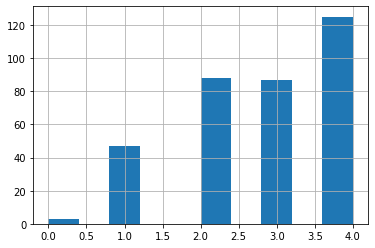

In [29]:
int_hist (stud_math,'medu')

In [30]:
# для замены выбран 2 вариант
stud_math.medu = stud_math.medu.fillna(stud_math.medu.median())

In [31]:
#Проверка
stud_math.medu.isna().sum()

0

AxesSubplot(0.125,0.125;0.775x0.755)
count    352.000000
mean       2.812500
std        1.088171
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64
0.0      3
1.0     47
2.0     88
3.0     89
4.0    125
Name: medu, dtype: int64


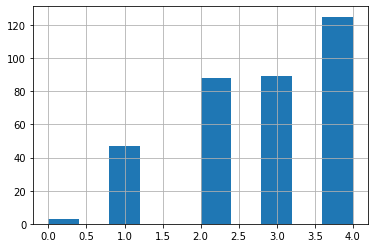

In [32]:
int_hist (stud_math,'medu')

# fedu

In [33]:
uniq_nan(stud_math,'fedu')

Столбец: fedu является числовым
      0
0   4.0
1   1.0
2   2.0
3   3.0
4  40.0
5   NaN
6   0.0
Пропущено значений: 21
Доля пропущенных значений: 6.0
2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
Name: fedu, dtype: int64


In [34]:
# для замены выбран 2 вариант
stud_math.fedu = stud_math.fedu.fillna(stud_math.fedu.median())

AxesSubplot(0.125,0.125;0.775x0.755)
count    352.000000
mean       2.678977
std        2.254925
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64
40.0      1
0.0       2
1.0      65
4.0      80
2.0      94
3.0     110
Name: fedu, dtype: int64


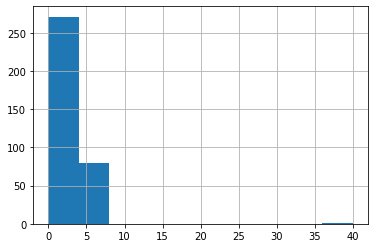

In [35]:
int_hist (stud_math,'fedu')

Значение 40 явно выделяется из общей картины. Скорее всего это ошибка в заполнении. Данное значение предлагается изменить на 4

In [36]:
stud_math.loc[stud_math.fedu == 40.0, 'fedu'] = 4.0

AxesSubplot(0.125,0.125;0.775x0.755)
count    352.000000
mean       2.576705
std        1.053997
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64
0.0      2
1.0     65
4.0     81
2.0     94
3.0    110
Name: fedu, dtype: int64


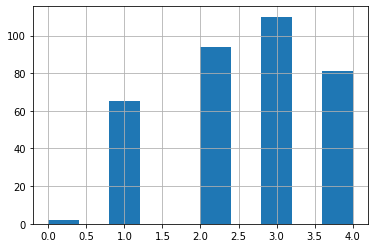

In [37]:
int_hist (stud_math,'fedu')

# mjob

In [39]:
uniq_nan(stud_math,'mjob')

Столбец: mjob не является числовым
          0
0   at_home
1    health
2     other
3  services
4   teacher
5       NaN
Пропущено значений: 17
Доля пропущенных значений: 5.0
other       115
services     90
teacher      51
at_home      49
health       30
Name: mjob, dtype: int64


In [40]:
# Для замены выбран 1 вариант (неизвестное)
stud_math.mjob = stud_math.mjob.fillna('unknown')
#Проверка
stud_math.mjob.isna().sum()

0

# fjob

In [41]:
uniq_nan(stud_math,'fjob')

Столбец: fjob не является числовым
          0
0   teacher
1     other
2       NaN
3    health
4  services
5   at_home
Пропущено значений: 32
Доля пропущенных значений: 9.0
other       176
services     89
teacher      26
health       15
at_home      14
Name: fjob, dtype: int64


In [42]:
# Для замены выбран 1 вариант (неизвестное)
stud_math.fjob = stud_math.fjob.fillna('unknown')
#Проверка
stud_math.fjob.isna().sum()

0

# reason

In [43]:
uniq_nan(stud_math,'reason')

Столбец: reason не является числовым
            0
0      course
1       other
2        home
3  reputation
4         NaN
Пропущено значений: 15
Доля пропущенных значений: 4.0
course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64


In [44]:
# Для замены выбран 1 вариант (неизвестное)
stud_math.reason = stud_math.reason.fillna('unknown')
#Проверка
stud_math.reason.isna().sum()

0

# guardian

In [45]:
uniq_nan(stud_math,'guardian')

Столбец: guardian не является числовым
        0
0  mother
1  father
2   other
3     NaN
Пропущено значений: 29
Доля пропущенных значений: 8.0
mother    225
father     78
other      20
Name: guardian, dtype: int64


In [46]:
# Для замены выбран 1 вариант (неизвестное)
stud_math.guardian = stud_math.guardian.fillna('unknown')
#Проверка
stud_math.guardian.isna().sum()

0

# traveltime

In [47]:
uniq_nan(stud_math,'traveltime')

Столбец: traveltime является числовым
     0
0  2.0
1  1.0
2  3.0
3  NaN
4  4.0
Пропущено значений: 23
Доля пропущенных значений: 7.0
1.0    219
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64


In [48]:
# для замены выбран 2 вариант
stud_math.traveltime = stud_math.traveltime.fillna(stud_math.traveltime.median())

AxesSubplot(0.125,0.125;0.775x0.755)
count    352.000000
mean       1.400568
std        0.676256
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
4.0      7
3.0     17
2.0     86
1.0    242
Name: traveltime, dtype: int64


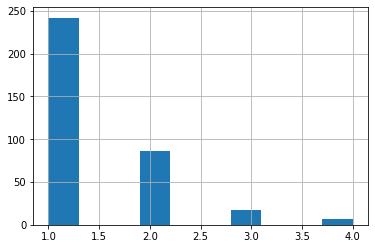

In [49]:
int_hist (stud_math,'traveltime')

# studytime

In [50]:
uniq_nan(stud_math,'studytime')

Столбец: studytime является числовым
     0
0  2.0
1  3.0
2  1.0
3  NaN
4  4.0
Пропущено значений: 7
Доля пропущенных значений: 2.0
2.0    173
1.0     90
3.0     58
4.0     24
Name: studytime, dtype: int64


In [51]:
# для замены выбран 2 вариант
stud_math.studytime = stud_math.studytime.fillna(stud_math.studytime.median())

AxesSubplot(0.125,0.125;0.775x0.755)
count    352.000000
mean       2.045455
std        0.832517
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
4.0     24
3.0     58
1.0     90
2.0    180
Name: studytime, dtype: int64


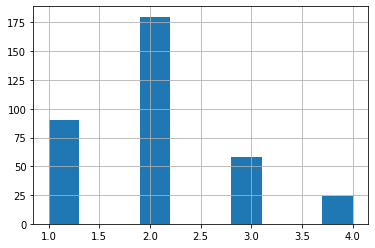

In [52]:
int_hist (stud_math,'studytime')

# failures

In [53]:
uniq_nan(stud_math,'failures')

Столбец: failures является числовым
     0
0  0.0
1  3.0
2  NaN
3  2.0
4  1.0
Пропущено значений: 20
Доля пропущенных значений: 6.0
0.0    273
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64


In [54]:
# для замены выбран 2 вариант
stud_math.failures = stud_math.failures.fillna(stud_math.failures.median())

AxesSubplot(0.125,0.125;0.775x0.755)
count    352.000000
mean       0.255682
std        0.651513
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
3.0     10
2.0     11
1.0     38
0.0    293
Name: failures, dtype: int64


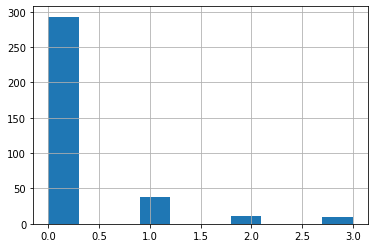

In [55]:
int_hist (stud_math,'failures')

# schoolsup

In [56]:
uniq_nan(stud_math,'schoolsup')

Столбец: schoolsup не является числовым
     0
0  yes
1   no
2  NaN
Пропущено значений: 9
Доля пропущенных значений: 3.0
no     295
yes     48
Name: schoolsup, dtype: int64


In [57]:
# Для замены выбран 1 вариант (неизвестное)
stud_math.schoolsup = stud_math.schoolsup.fillna('unknown')
#Проверка
stud_math.schoolsup.isna().sum()

0

# paid

In [58]:
uniq_nan(stud_math,'paid')

Столбец: paid не является числовым
     0
0   no
1  NaN
2  yes
Пропущено значений: 36
Доля пропущенных значений: 10.0
no     170
yes    146
Name: paid, dtype: int64


In [59]:
# Для замены выбран 1 вариант (неизвестное)
stud_math.paid = stud_math.paid.fillna('unknown')
#Проверка
stud_math.paid.isna().sum()

0

# activities

In [60]:
uniq_nan(stud_math,'activities')

Столбец: activities не является числовым
     0
0   no
1  yes
2  NaN
Пропущено значений: 12
Доля пропущенных значений: 3.0
yes    172
no     168
Name: activities, dtype: int64


In [61]:
# Для замены выбран 1 вариант (неизвестное)
stud_math.activities = stud_math.activities.fillna('unknown')
#Проверка
stud_math.activities.isna().sum()

0

# nursery

In [62]:
uniq_nan(stud_math,'nursery')

Столбец: nursery не является числовым
     0
0  yes
1   no
2  NaN
Пропущено значений: 12
Доля пропущенных значений: 3.0
yes    272
no      68
Name: nursery, dtype: int64


In [63]:
# Для замены выбран 1 вариант (неизвестное)
stud_math.nursery = stud_math.nursery.fillna('unknown')
#Проверка
stud_math.nursery.isna().sum()

0

# higher

In [64]:
uniq_nan(stud_math,'higher')

Столбец: higher не является числовым
     0
0  yes
1  NaN
2   no
Пропущено значений: 19
Доля пропущенных значений: 5.0
yes    320
no      13
Name: higher, dtype: int64


In [65]:
# Для замены выбран 1 вариант (неизвестное)
stud_math.higher = stud_math.higher.fillna('unknown')
#Проверка
stud_math.higher.isna().sum()

0

# internet

In [66]:
uniq_nan(stud_math,'internet')

Столбец: internet не является числовым
     0
0  NaN
1  yes
2   no
Пропущено значений: 29
Доля пропущенных значений: 8.0
yes    274
no      49
Name: internet, dtype: int64


In [67]:
# Для замены выбран 3 вариант (часто встречающееся)
stud_math.internet = stud_math.internet.fillna('yes')
#Проверка
stud_math.higher.isna().sum()

0

# romantic

In [68]:
uniq_nan(stud_math,'romantic')

Столбец: romantic не является числовым
     0
0   no
1  NaN
2  yes
Пропущено значений: 29
Доля пропущенных значений: 8.0
no     219
yes    104
Name: romantic, dtype: int64


In [69]:
# Для замены выбран 1 вариант (неизвестное)
stud_math.romantic = stud_math.romantic.fillna('unknown')
#Проверка
stud_math.romantic.isna().sum()

0

# famrel

In [70]:
uniq_nan(stud_math,'famrel')

Столбец: famrel является числовым
     0
0  4.0
1  5.0
2  3.0
3  NaN
4 -1.0
5  2.0
6  1.0
Пропущено значений: 24
Доля пропущенных значений: 7.0
 4.0    163
 5.0     88
 3.0     56
 2.0     14
 1.0      6
-1.0      1
Name: famrel, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)
count    352.000000
mean       0.255682
std        0.651513
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
3.0     10
2.0     11
1.0     38
0.0    293
Name: failures, dtype: int64


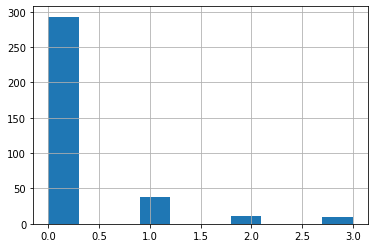

In [71]:
int_hist (stud_math,'failures')

In [72]:
# для замены выбран 2 вариант
stud_math.famrel = stud_math.failures.fillna(stud_math.famrel.median())
#Проверка
stud_math.failures.isna().sum()

0

AxesSubplot(0.125,0.125;0.775x0.755)
count    352.000000
mean       0.255682
std        0.651513
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
3.0     10
2.0     11
1.0     38
0.0    293
Name: failures, dtype: int64


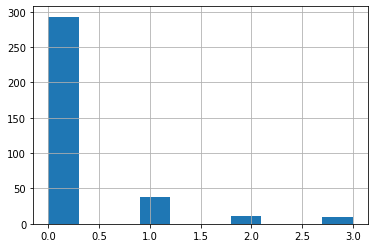

In [73]:
int_hist (stud_math,'failures')

# freetime

In [74]:
uniq_nan(stud_math,'freetime')

Столбец: freetime является числовым
     0
0  3.0
1  2.0
2  4.0
3  1.0
4  5.0
5  NaN
Пропущено значений: 8
Доля пропущенных значений: 2.0
3.0    132
4.0    102
2.0     59
5.0     35
1.0     16
Name: freetime, dtype: int64


In [75]:
# для замены выбран 2 вариант
stud_math.freetime = stud_math.freetime.fillna(stud_math.freetime.median())
#Проверка
stud_math.freetime.isna().sum()

0

AxesSubplot(0.125,0.125;0.775x0.755)
count    352.000000
mean       3.230114
std        0.993369
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
1.0     16
5.0     35
2.0     59
4.0    102
3.0    140
Name: freetime, dtype: int64


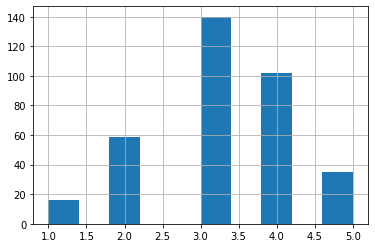

In [76]:
int_hist (stud_math,'freetime')

# goout

In [77]:
uniq_nan(stud_math,'goout')

Столбец: goout является числовым
     0
0  4.0
1  3.0
2  2.0
3  1.0
4  5.0
5  NaN
Пропущено значений: 6
Доля пропущенных значений: 2.0
3.0    118
2.0     92
4.0     74
5.0     43
1.0     19
Name: goout, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)
count    346.000000
mean       3.086705
std        1.091998
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
1.0     19
5.0     43
4.0     74
2.0     92
3.0    118
Name: goout, dtype: int64


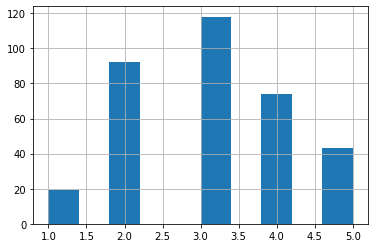

In [78]:
int_hist (stud_math,'goout')

In [79]:
# для замены выбран 2 вариант
stud_math.goout = stud_math.goout.fillna(stud_math.goout.median())
#Проверка
stud_math.goout.isna().sum()

0

# health

In [80]:
uniq_nan(stud_math,'health')

Столбец: health является числовым
     0
0  3.0
1  5.0
2  1.0
3  2.0
4  4.0
5  NaN
Пропущено значений: 13
Доля пропущенных значений: 4.0
5.0    124
3.0     81
4.0     53
1.0     45
2.0     36
Name: health, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)
count    339.000000
mean       3.516224
std        1.412812
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
2.0     36
1.0     45
4.0     53
3.0     81
5.0    124
Name: health, dtype: int64


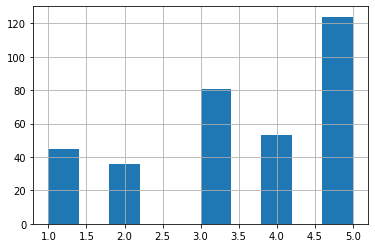

In [81]:
int_hist (stud_math,'health')

In [82]:
# для замены выбран 2 вариант
stud_math.health = stud_math.health.fillna(stud_math.health.median())
#Проверка
stud_math.health.isna().sum()

0

# absences

In [83]:
uniq_nan(stud_math,'absences')

Столбец: absences является числовым
        0
0     6.0
1     4.0
2    10.0
3     2.0
4     0.0
5    16.0
6     NaN
7    14.0
8     7.0
9     8.0
10   25.0
11   12.0
12   54.0
13   18.0
14   26.0
15   20.0
16   56.0
17   24.0
18   28.0
19    5.0
20   13.0
21   15.0
22   22.0
23    3.0
24  385.0
25   21.0
26    1.0
27   75.0
28   30.0
29   19.0
30    9.0
31   11.0
32   38.0
33   40.0
34   23.0
35   17.0
36  212.0
Пропущено значений: 10
Доля пропущенных значений: 3.0
0.0      74
2.0      60
4.0      52
6.0      30
8.0      20
10.0     17
12.0     12
14.0     12
3.0       7
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
9.0       3
1.0       3
15.0      2
13.0      2
11.0      2
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
17.0      1
28.0      1
Name: absences, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)
count    342.000000
mean       8.090643
std       24.704600
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
28.0      1
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
21.0      1
17.0      1
13.0      2
11.0      2
15.0      2
9.0       3
22.0      3
1.0       3
20.0      4
18.0      5
5.0       5
7.0       6
16.0      7
3.0       7
14.0     12
12.0     12
10.0     17
8.0      20
6.0      30
4.0      52
2.0      60
0.0      74
Name: absences, dtype: int64


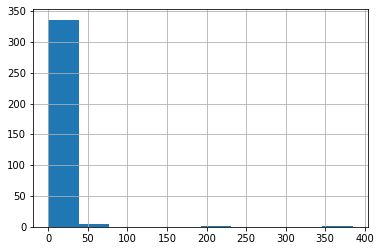

In [84]:
int_hist (stud_math,'absences')

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


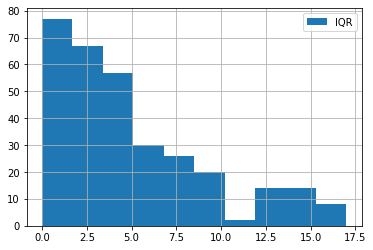

In [85]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


stud_math_absences_plot = stud_math.absences[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
stud_math_absences_plot.hist(bins = 10,label = 'IQR')
plt.legend();

In [86]:
# для замены выбран 2 вариант
stud_math.absences = stud_math.absences.fillna(stud_math.absences.median())

AxesSubplot(0.125,0.125;0.775x0.755)
count    352.000000
mean       7.974432
std       24.359649
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
28.0      1
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
21.0      1
17.0      1
13.0      2
11.0      2
15.0      2
9.0       3
22.0      3
1.0       3
20.0      4
18.0      5
5.0       5
7.0       6
16.0      7
3.0       7
14.0     12
12.0     12
10.0     17
8.0      20
6.0      30
2.0      60
4.0      62
0.0      74
Name: absences, dtype: int64


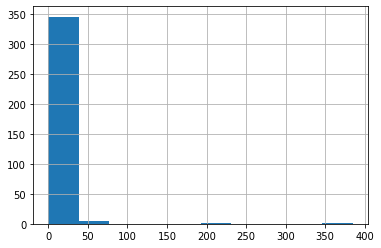

In [87]:
int_hist (stud_math,'absences')

# Проверка корреляции

In [88]:
#проверка корреляции
stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.123376,-0.130428,0.099530,-0.011270,0.236688,0.236688,0.001563,0.123597,-0.055674,0.111619,-0.131542
medu,-0.123376,1.000000,0.591354,-0.157040,0.069187,-0.205450,-0.205450,0.018944,0.078894,-0.044754,-0.026084,0.184533
fedu,-0.130428,0.591354,1.000000,-0.141158,-0.007232,-0.256830,-0.256830,-0.020988,0.046684,0.016691,0.013781,0.131907
traveltime,0.099530,-0.157040,-0.141158,1.000000,-0.098219,0.083732,0.083732,-0.018856,0.038845,-0.019123,-0.039154,-0.072435
studytime,-0.011270,0.069187,-0.007232,-0.098219,1.000000,-0.147551,-0.147551,-0.126369,-0.029597,-0.080160,-0.029585,0.139605
failures,0.236688,-0.205450,-0.256830,0.083732,-0.147551,1.000000,1.000000,0.124534,0.122500,0.059584,0.090709,-0.286925
famrel,0.236688,-0.205450,-0.256830,0.083732,-0.147551,1.000000,1.000000,0.124534,0.122500,0.059584,0.090709,-0.286925
freetime,0.001563,0.018944,-0.020988,-0.018856,-0.126369,0.124534,0.124534,1.000000,0.294294,0.069643,0.004836,-0.014731
goout,0.123597,0.078894,0.046684,0.038845,-0.029597,0.122500,0.122500,0.294294,1.000000,-0.007619,-0.051121,-0.179913
health,-0.055674,-0.044754,0.016691,-0.019123,-0.080160,0.059584,0.059584,0.069643,-0.007619,1.000000,-0.014747,-0.078860


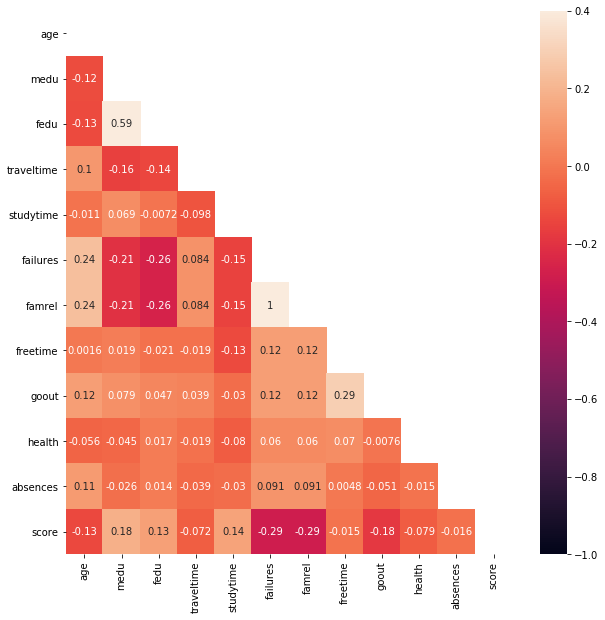

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
corr = stud_math.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True,  fmt='.2g', mask=matrix,
            vmin=-1, vmax=0.4)

У признаков критической корреляции нет

In [90]:
# оценка корреляции с целевым показателем 'score'
stud_math.corr().score

age          -0.131542
medu          0.184533
fedu          0.131907
traveltime   -0.072435
studytime     0.139605
failures     -0.286925
famrel       -0.286925
freetime     -0.014731
goout        -0.179913
health       -0.078860
absences     -0.016172
score         1.000000
Name: score, dtype: float64

Наибольшее значение коэффииента корреляции -0,29 по колонкам 'failures' (количество внеучебных неудач) и 'famrel'(семейные отношения).
Наименьший коэффициент у показателя 'freetime'. Его значение составляет -0,014.  

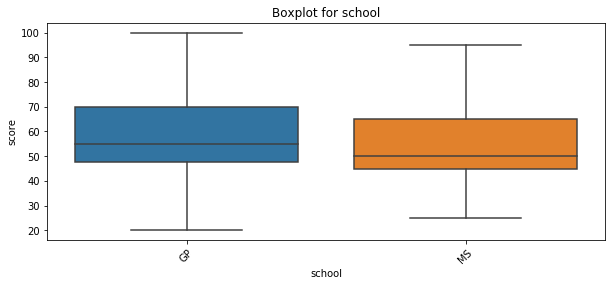

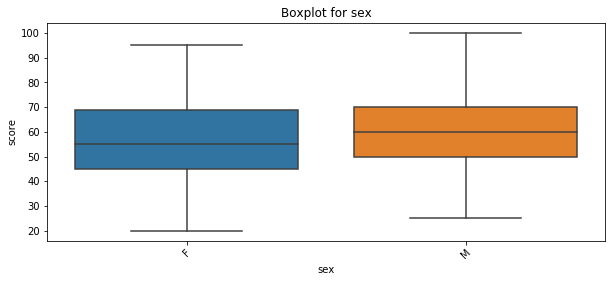

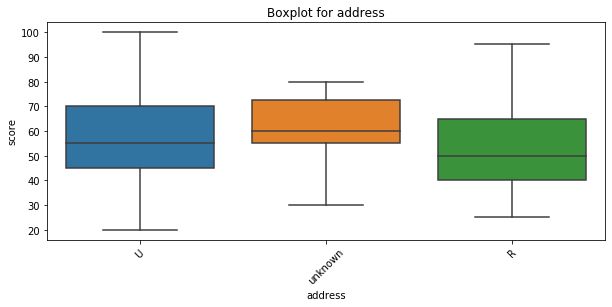

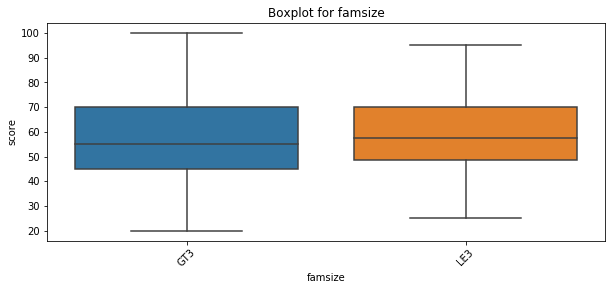

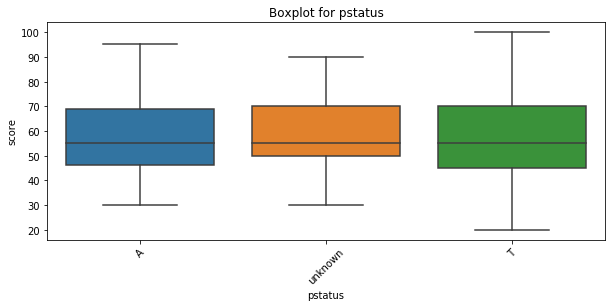

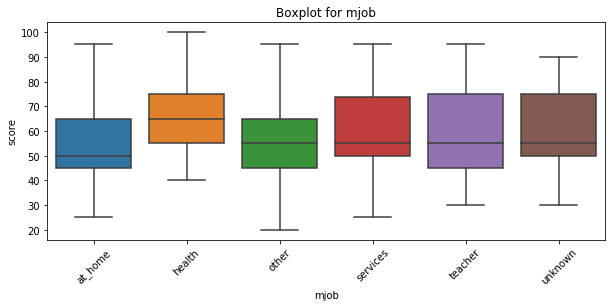

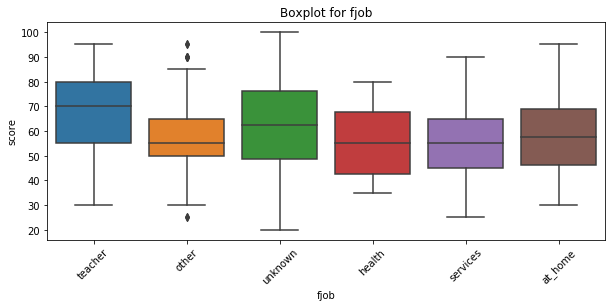

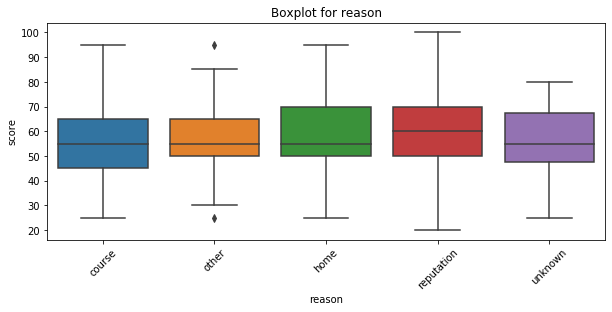

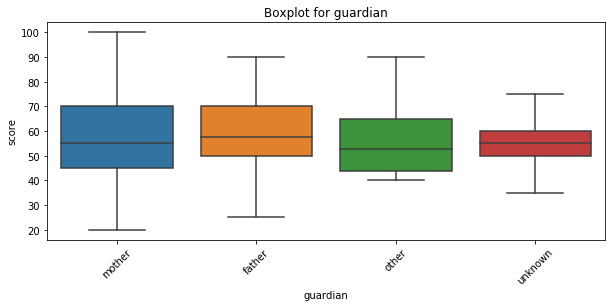

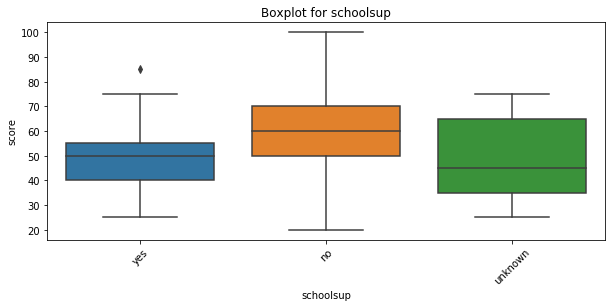

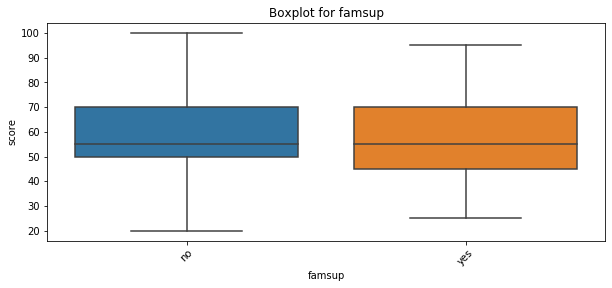

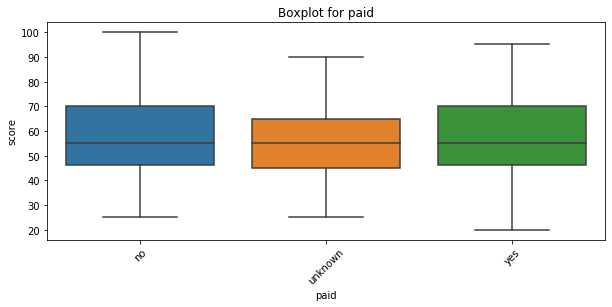

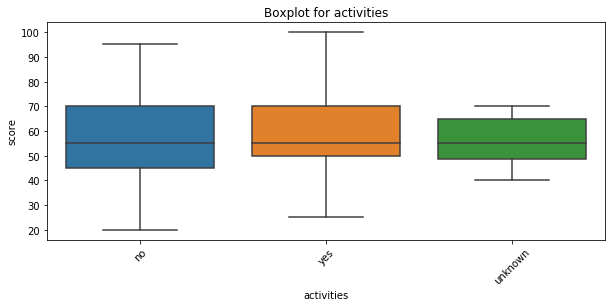

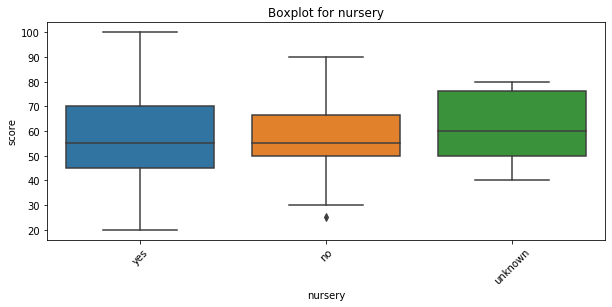

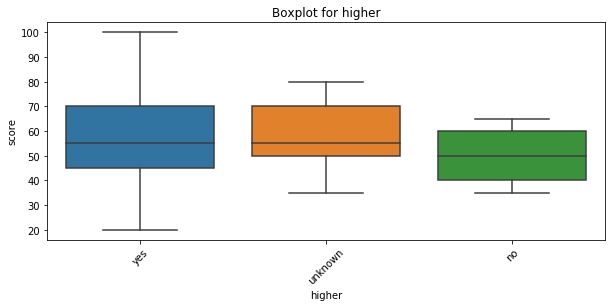

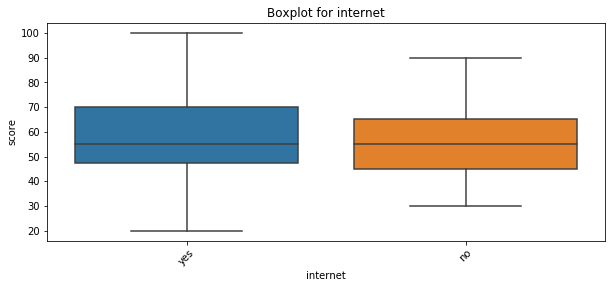

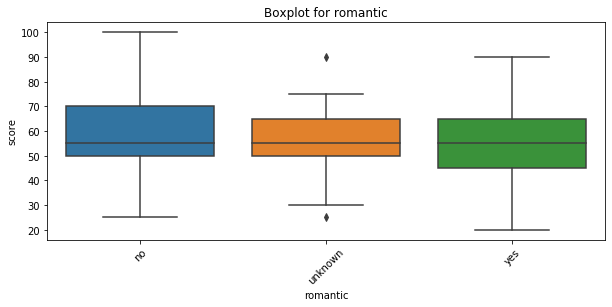

In [91]:
# Ниже составлены графики плотности распределения значений для нечисловых значений 
list_col_n = ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']

for i in range(0,len(list_col_n)):
    get_boxplot (stud_math, list_col_n[i])

Наименее значимые данные содержатся в колонках famsize, pstatus, romantic

In [92]:
list_col_n = ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']

for i in range(0,len(list_col_n)):
    get_stat_dif(stud_math, list_col_n[i])

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки fjob
Найдены статистически значимые различия для колонки schoolsup


# Результат:
### 1. На первом этапе была проведена оценка качества заполнения. В первую очередь просмотрена результирующая колонка и колонки с пропусками
### 2. Проведен корреляционный анализ с результирующей колонкой и показателями между собой. Наименее значимые по итогам показатели содержатся в колонках: "failures" и "absences" 
### Из нечисловых показателей как статистически значимые были выделены "address", "mjob", "fjob", "schoolsup".